In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime

In [3]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv', header=0,parse_dates=True,index_col='Month')

In [4]:
series.head()

,Sales of shampoo over a three year period
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [5]:
series = series.dropna()

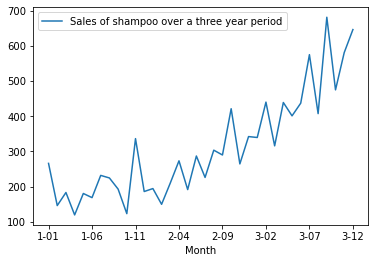

In [6]:
series.plot()
plt.show()

In [7]:
X = series.values

In [8]:
X

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [9]:
size = int(len(X) * 0.60)
print(len(X))
print(size)

36
21


In [10]:
train, test = X[0:size], X[size:len(X)]

In [11]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history,order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'Predicted={yhat},Expected ={obs}')
error = mean_squared_error(test,predictions)
print(f"TEST MSE :{error}")

C:\Users\THARUN\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Predicted=[272.96451422],Expected =[421.6]
Predicted=[290.31366212],Expected =[264.5]
Predicted=[349.11764194],Expected =[342.3]
Predicted=[306.51293429],Expected =[339.7]
Predicted=[387.37635503],Expected =[440.4]
Predicted=[348.15422407],Expected =[315.9]
Predicted=[386.30873564],Expected =[439.3]
Predicted=[356.08213522],Expected =[401.3]
Predicted=[446.37949922],Expected =[437.4]
Predicted=[394.73731958],Expected =[575.5]
Predicted=[434.9155186],Expected =[407.6]
Predicted=[507.92333692],Expected =[682.]
Predicted=[435.48297593],Expected =[475.3]
Predicted=[652.74379393],Expected =[581.3]
Predicted=[546.34341033],Expected =[646.9]
TEST MSE :7547.808313002451


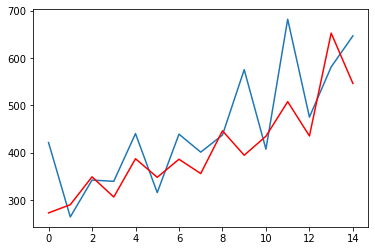

In [12]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()